Fs ≈ 1600.00 Hz


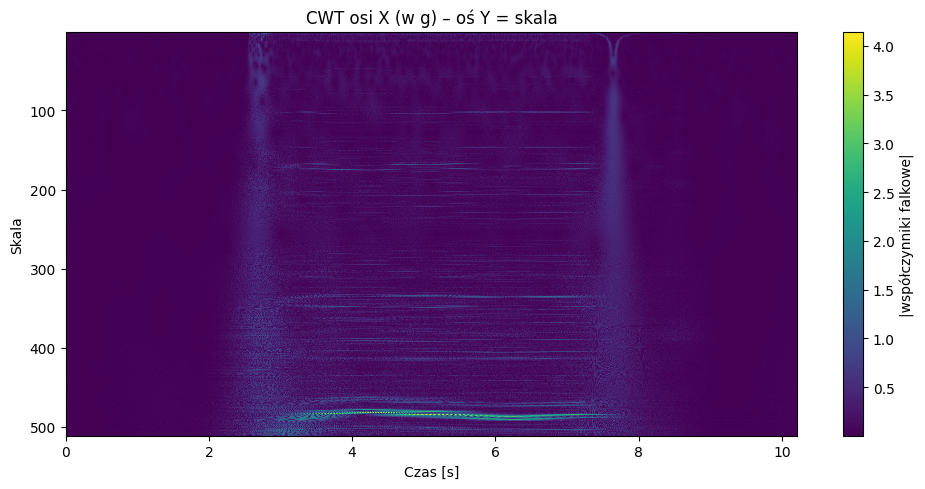

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

lsb_to_g = 0.0039  # PRZYKŁAD, wpisz swoją wartość z datasheetu

# --- WCZYTANIE DANYCH ---
df = pd.read_csv('data/pomiary_04_11_25/pomiar_z_20.csv')

# Zakładam kolumny: 'czas', 'X', 'Y', 'Z'
t = df['czas [s]'].values
X = df['X'].values

# --- KONWERSJA DO g (tylko X, ale zostawiamy też resztę na przyszłość) ---
df['X_g'] = df['X'] * lsb_to_g
df['Y_g'] = df['Y'] * lsb_to_g
df['Z_g'] = df['Z'] * lsb_to_g

X_g = df['X_g'].values

# Usunięcie składowej stałej
X_g = X_g - np.mean(X_g)

# --- CZĘSTOTLIWOŚĆ PRÓBKOWANIA (na przyszłość) ---
dt = np.mean(np.diff(t))
Fs = 1.0 / dt
print(f"Fs ≈ {Fs:.2f} Hz")

# --- CWT DLA OSI X (W JEDNOSTKACH g) ---
signal = X_g

# Skale – oś Y skalogramu
# większa skala => niższe częstotliwości
scales = np.arange(1, 512)

wavelet = 'cmor2.5-1.0'      # falka Morleta (zespolona)

# sampling_period podajemy już teraz, ale do wykresu użyjemy *skali*, nie częstotliwości
coeffs, freqs = pywt.cwt(signal, scales, wavelet, sampling_period=dt)
power = np.abs(coeffs)

# --- SKALOGRAM: OŚ Y = SKALA ---
plt.figure(figsize=(10, 5))
plt.pcolormesh(
    t,          # oś X = czas
    scales,     # oś Y = skala
    power,      # moduł współczynników
    shading='auto'
)
plt.gca().invert_yaxis()
plt.xlabel('Czas [s]')
plt.ylabel('Skala')
plt.title('CWT osi X (w g) – oś Y = skala')
cbar = plt.colorbar()
cbar.set_label('|współczynniki falkowe|')
plt.tight_layout()
plt.show()

Fs ≈ 1600.00 Hz


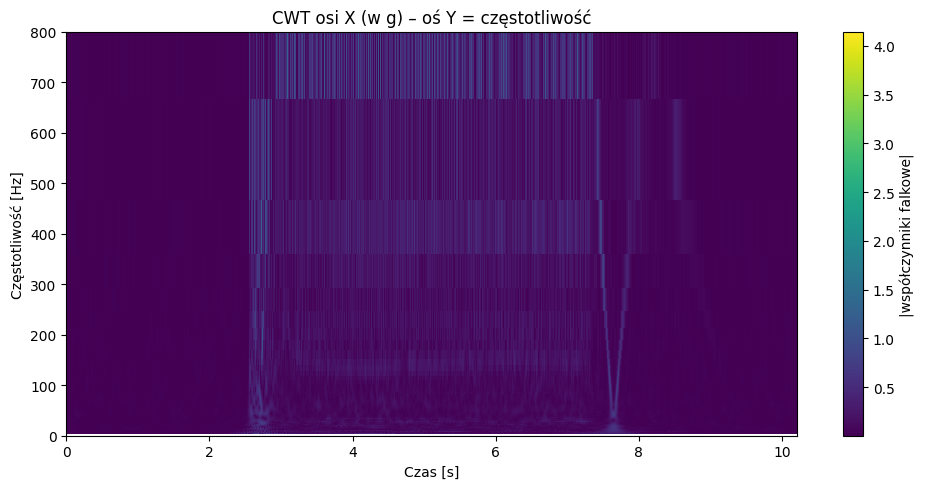

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

# --- parametry czujnika ---
lsb_to_g = 0.0039  # <- Twoja wartość z datasheetu

# --- wczytanie danych ---
df = pd.read_csv('data/pomiary_04_11_25/pomiar_z_20.csv')

t = df['czas [s]'].values
X = df['X'].values

# konwersja do g
X_g = (X * lsb_to_g).astype(float)
X_g = X_g - X_g.mean()     # usunięcie offsetu

# krok czasowy i Fs
dt = np.mean(np.diff(t))
Fs = 1.0 / dt
print(f"Fs ≈ {Fs:.2f} Hz")

# --- CWT ---
signal = X_g

wavelet = 'cmor2.5-1.0'          # falka Morleta
scales = np.arange(1, 512)       # skale jak wcześniej

coeffs, freqs = pywt.cwt(signal, scales, wavelet, sampling_period=dt)
power = np.abs(coeffs)

# freqs jest powiązane 1:1 ze scales, ale maleje wraz ze skalą
# chcemy mieć oś Y rosnącą w Hz → sortujemy:
idx = np.argsort(freqs)          # indeksy sortujące rosnąco
freqs_sorted = freqs[idx]
power_sorted = power[idx, :]     # przemeblowanie wierszy

# zakres częstotliwości do pokazania (np. 0–800 Hz)
f_min, f_max = 0, 800
mask = (freqs_sorted >= f_min) & (freqs_sorted <= f_max)

plt.figure(figsize=(10, 5))
plt.pcolormesh(
    t,
    freqs_sorted[mask],
    power_sorted[mask, :],
    shading='auto'
)
plt.xlabel('Czas [s]')
plt.ylabel('Częstotliwość [Hz]')
plt.title('CWT osi X (w g) – oś Y = częstotliwość')
cbar = plt.colorbar()
cbar.set_label('|współczynniki falkowe|')
plt.ylim(f_min, f_max)
plt.tight_layout()
plt.show()
